In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('bitcoin_2010-07-17_2024-06-28.csv')

In [32]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-27,2024-06-28,60882.90,62338.43,60666.19,61646.05,1.215887e+11,1.208392e+12
1,2024-06-26,2024-06-27,61733.99,62357.58,60761.24,60761.24,1.017576e+11,1.210544e+12
2,2024-06-25,2024-06-26,60317.99,62231.16,60272.58,61789.98,1.050312e+11,1.208415e+12
3,2024-06-24,2024-06-25,63168.03,63316.01,58946.24,60382.81,8.828355e+10,1.211101e+12
4,2024-06-23,2024-06-24,64276.04,64521.03,63290.43,63290.43,6.853945e+10,1.265327e+12


In [33]:
# Preprocess the date into separate features
df['Start'] = pd.to_datetime(df['Start'])
df['Year'] = df['Start'].dt.year
df['Month'] = df['Start'].dt.month
df['Day'] = df['Start'].dt.day

# Select features for training (Day, Month, Year) and the target variable (Close)
X = df[['Day', 'Month', 'Year']]
y = df['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be 3D for LSTM (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(1, X_train_scaled.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")

Epoch 1/100
4076/4076 [==============================] - 12s 2ms/step - loss: 553541568.0000
Epoch 2/100
4076/4076 [==============================] - 10s 2ms/step - loss: 550288000.0000
Epoch 3/100
4076/4076 [==============================] - 10s 2ms/step - loss: 547385792.0000
Epoch 4/100
4076/4076 [==============================] - 9s 2ms/step - loss: 544531968.0000
Epoch 5/100
4076/4076 [==============================] - 10s 2ms/step - loss: 541719936.0000
Epoch 6/100
4076/4076 [==============================] - 9s 2ms/step - loss: 538917312.0000
Epoch 7/100
4076/4076 [==============================] - 11s 3ms/step - loss: 536165568.0000
Epoch 8/100
4076/4076 [==============================] - 9s 2ms/step - loss: 533424512.0000
Epoch 9/100
4076/4076 [==============================] - 10s 2ms/step - loss: 530727680.0000
Epoch 10/100
4076/4076 [==============================] - 10s 2ms/step - loss: 528043200.0000
Epoch 11/100
4076/4076 [==============================] - 10s 2ms/step -

# **hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh**

In [5]:
data = pd.read_csv('bitcoin_2010-07-17_2024-06-28.csv')

In [6]:
# Convert 'Start' and 'End' to datetime and extract year and month
data['Start'] = pd.to_datetime(data['Start'])
data['Year'] = data['Start'].dt.year
data['Month'] = data['Start'].dt.month

# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'Market Cap', 'Year', 'Month']
target = 'Close'

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

# Prepare the target data
target_data = data[target].values.reshape(-1, 1)
scaled_target = scaler.fit_transform(target_data)

In [7]:
def create_sequences(data, target, time_steps=5):
    X = []
    y = []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Create sequences (using 5 time steps as an example)
time_steps = 5
X, y = create_sequences(scaled_data, scaled_target, time_steps)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
128/128 [==============================] - 7s 15ms/step - loss: 0.0030 - val_loss: 2.7532e-04
Epoch 2/20
128/128 [==============================] - 1s 7ms/step - loss: 2.2870e-04 - val_loss: 1.7423e-04
Epoch 3/20
128/128 [==============================] - 1s 7ms/step - loss: 2.1199e-04 - val_loss: 1.7609e-04
Epoch 4/20
128/128 [==============================] - 1s 7ms/step - loss: 1.9821e-04 - val_loss: 2.2759e-04
Epoch 5/20
128/128 [==============================] - 1s 8ms/step - loss: 2.5587e-04 - val_loss: 5.7749e-04
Epoch 6/20
128/128 [==============================] - 1s 8ms/step - loss: 2.0548e-04 - val_loss: 2.5853e-04
Epoch 7/20
128/128 [==============================] - 1s 8ms/step - loss: 1.9649e-04 - val_loss: 1.7999e-04
Epoch 8/20
128/128 [==============================] - 1s 7ms/step - loss: 1.9297e-04 - val_loss: 1.6059e-04
Epoch 9/20
128/128 [==============================] - 1s 7ms/step - loss: 1.9849e-04 - val_loss: 1.3936e-04
Epoch 10/20
128/128 [==========

32/32 [==============================] - 1s 3ms/step
R² Score: 0.9992281488514864


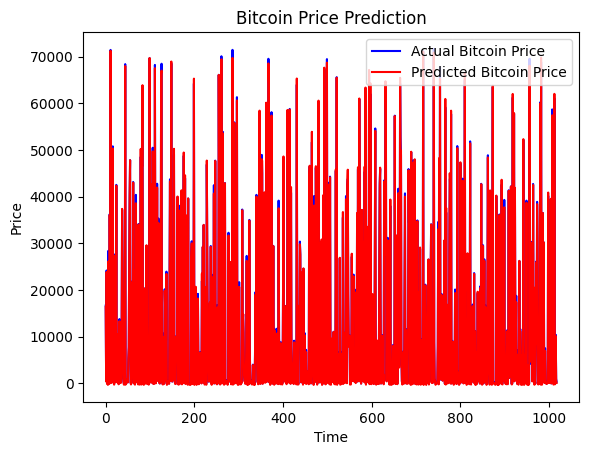

In [9]:
# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform to get the actual values
predicted_values = scaler.inverse_transform(predicted_values)
actual_values = scaler.inverse_transform(y_test)

# Calculate R² score
r2 = r2_score(actual_values, predicted_values)
print(f'R² Score: {r2}')

# Plot the results
plt.plot(actual_values, color='blue', label='Actual Bitcoin Price')
plt.plot(predicted_values, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
def predict_future(day, month, year):
    # Get the last known data points from the dataset (using the last row in this case)
    last_row = data.iloc[-1]
    latest_open = last_row['Open']
    latest_high = last_row['High']
    latest_low = last_row['Low']
    latest_volume = last_row['Volume']
    latest_market_cap = last_row['Market Cap']
    
    # Add the new date provided by the user
    input_data = np.array([[latest_open, latest_high, latest_low, latest_volume, latest_market_cap, year, month]])
    
    # Scale the input data
    scaled_input = scaler.transform([input_data])
    
    # Reshape the input to match the LSTM model's expected input format (samples, time steps, features)
    scaled_input = np.reshape(scaled_input, (1, time_steps, X_train.shape[2]))  # X_train.shape[2] is the number of features

    # Predict using the LSTM model
    prediction = model.predict(scaled_input)
    
    # Inverse transform the prediction to get the actual Bitcoin price
    predicted_price = scaler.inverse_transform(prediction)
    
    return predicted_price

# Example usage:
day_input = 25
month_input = 6
year_input = 2025

future_prediction = predict_future(day_input, month_input, year_input)
print(f"Predicted Bitcoin Price for {day_input}/{month_input}/{year_input}: {future_prediction[0][0]}")


ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [7]:
# Parse the timestamp and create new date-based columns (for user input later)
data['Start'] = pd.to_datetime(data['Start'])
data['year'] = data['Start'].dt.year
data['month'] = data['Start'].dt.month
data['day'] = data['Start'].dt.day

# Feature selection (we'll predict 'close' price, and use others as input)
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Normalize the features and target
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])
scaled_target = scaler.fit_transform(data[[target]])

# Convert to DataFrame for easier manipulation
scaled_data = pd.DataFrame(scaled_features, columns=features)
scaled_data['Close'] = scaled_target

# Prepare the data for LSTM
sequence_length = 60  # Using the last 60 minutes to predict the next one

In [8]:
# Create sequences and targets
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data.iloc[i-sequence_length:i].values)
    y.append(scaled_data.iloc[i]['Close'])

X, y = np.array(X), np.array(y)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### **LSTM**

In [9]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=32, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))  # Predict the 'close' value
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
126/126 [==============================] - 11s 41ms/step - loss: 0.0048 - val_loss: 6.2029e-05
Epoch 2/5
126/126 [==============================] - 4s 32ms/step - loss: 0.0020 - val_loss: 2.2923e-06
Epoch 3/5
126/126 [==============================] - 4s 34ms/step - loss: 0.0015 - val_loss: 1.1398e-08
Epoch 4/5
126/126 [==============================] - 4s 32ms/step - loss: 0.0015 - val_loss: 4.6591e-06
Epoch 5/5
126/126 [==============================] - 4s 32ms/step - loss: 0.0012 - val_loss: 4.0143e-06


In [11]:
from sklearn.metrics import r2_score
# Predict on the test set
y_pred = lstm_model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print(f'R² score: {r2}')

32/32 [==============================] - 1s 11ms/step
R² score: -52.243483408681286


In [12]:
# Function to make predictions based on year, month, and day input
def predict_bitcoin_value(year, month, day, model):
    # Find the closest matching date in the dataset
    idx = data[(data['year'] == year) & 
               (data['month'] == month) & 
               (data['day'] == day)].index[0]
    
    input_data = scaled_data.iloc[idx-sequence_length:idx].values
    input_data = np.expand_dims(input_data, axis=0)
    
    # Predict the value
    predicted_value = model.predict(input_data)
    predicted_value = scaler.inverse_transform([[0]*len(features) + [predicted_value[0][0]]])[0][-1]
    
    return predicted_value

# Example usage:
year_input = 2025
month_input = 8
day_input = 2

predicted_lstm = predict_bitcoin_value(year_input, month_input, day_input, lstm_model)
print(f"LSTM predicted Bitcoin value on {year_input}-{month_input}-{day_input}: {predicted_lstm}")

IndexError: index 0 is out of bounds for axis 0 with size 0

### **RNN**

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50, return_sequences=False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=1))  # Predict the 'close' value
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Function to make predictions based on date, year, and month input
def predict_bitcoin_value(date_input, model):
    date_input = datetime.strptime(date_input, '%Y-%m-%d')
    
    # Find the closest matching date in the dataset
    idx = data[(data['year'] == date_input.year) & 
               (data['month'] == date_input.month) & 
               (data['day'] == date_input.day)].index[0]
    
    input_data = scaled_data.iloc[idx-sequence_length:idx].values
    input_data = np.expand_dims(input_data, axis=0)
    
    # Predict the value
    predicted_value = model.predict(input_data)
    predicted_value = scaler.inverse_transform([[0]*len(features) + [predicted_value[0][0]]])[0][-1]
    
    return predicted_value

# Example usage:
date_input = '2023-08-01'  # Example input for prediction
predicted_lstm = predict_bitcoin_value(date_input, lstm_model)
predicted_rnn = predict_bitcoin_value(date_input, rnn_model)

print(f"LSTM predicted Bitcoin value on {date_input}: {predicted_lstm}")
print(f"RNN predicted Bitcoin value on {date_input}: {predicted_rnn}")